# CRANKSHAFT. Análisis de precios de vehículos

## ¿Qué vende un coche?

## Contenido <a id='back'></a>

* [Introducción](#intro) 
* [Etapa 1. Exploración de los datos](#data_review)
* [Etapa 2. Preprocesamiento de datos](#data_preprocessing)
* [Etapa 3. EDA](#eda)
* [Etapa 5. Conclusión general](#end)



## Introducción <a id='intro'></a>


En este proyecto se analizará el contenido de Crankshaft List, cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

## Objetivos

1. Realizar un preprocesamiento de datos.
2. Ejecutar un A para investigar anómalías.
3. Investigar que factores que determinan el precio de los vehículos.

[Regresar a Contenido](#back)

## Etapa 1. Exploración de datos <a id='data_review'></a>

### Inicialización

In [32]:
# Cargar todas las librerías
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

### Cargar datos

In [33]:
# Carga el archivo de datos en un DataFrame
vehicles_data=pd.read_csv('/datasets/vehicles_us.csv')
vehicles_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina



In [34]:
# imprime la información general/resumida sobre el DataFrame
print(vehicles_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None


In [35]:
# imprimir una muestra de datos
print(vehicles_data.head(50))


    price  model_year                              model  condition  \
0    9400      2011.0                             bmw x5       good   
1   25500         NaN                         ford f-150       good   
2    5500      2013.0                     hyundai sonata   like new   
3    1500      2003.0                         ford f-150       fair   
4   14900      2017.0                       chrysler 200  excellent   
5   14990      2014.0                       chrysler 300  excellent   
6   12990      2015.0                       toyota camry  excellent   
7   15990      2013.0                        honda pilot  excellent   
8   11500      2012.0                        kia sorento  excellent   
9    9200      2008.0                        honda pilot  excellent   
10  19500      2011.0           chevrolet silverado 1500  excellent   
11   8990      2012.0                       honda accord  excellent   
12  18990      2012.0                           ram 1500  excellent   
13  16

Observando la información general, podemos observar datos ausentes y datos con tipo erroneo, datos de tipo booleano erroneos.   

In [36]:
vehicles_data.isna()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,True,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,False,False,False,False,False,False,False,False,False,False,True,False,False
51521,False,False,False,False,False,False,False,False,False,False,True,False,False
51522,False,False,False,False,False,False,False,False,False,False,True,False,False
51523,False,False,False,False,False,False,False,False,False,False,True,False,False


Sí, los datos de la columna 'date_posted' son tipo object, hay que cambiarlos a datetime; algunos datos ausentes en columnas de tipo booleano y hay que cambiarlo.

In [37]:
vehicles_data['is_4wd'].unique()

array([ 1., nan])

En algunas columnas 'model_yaer', 'cylinders', 'odometer', 'paint_color' se presentan datos ausentes.

In [38]:
vehicles_data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

### Conclusiones y siguientes pasos

Se encontraron datos ausentes y erroneos, podemos observar que en la columna '	is_4wd' solmente hay valores booleanos 1 y ausentes, pero no hay 0, por lo que por lo que podemos asumir que los valores ausentes son los 0, al igual que hay que cambiar el tipo de datos de las fechas a datetime.

•	Primero hay que cambiar los valores ausentes de la columna booleana 'is_4wd', sustituir los valores NaN por 0, si eliminamos antes los datos ausentes eliminaríamos toda una clasificación de información de esta columna.

•	Eliminar los datos ausentes

•	Cambiar tipo de dato de las fechas a datetime

In [39]:
vehicles_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


[Regresar a Contenido](#back)

## Step 2. Preprocesamiento de datos <a id='data_preprocessing'></a>

## Tratar los valores ausentes (si hay)



Comenzaremos eliminando los valores ausentes de la columna 'is_4wd' y reemplazarlo con el valor 0.

In [40]:
vehicles_data['is_4wd']=vehicles_data['is_4wd'].fillna(0)
print(vehicles_data['is_4wd'].isna().sum())

0


In [41]:
vehicles_data.isna().sum()/len(vehicles_data)

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.000000
date_posted     0.000000
days_listed     0.000000
dtype: float64

Podemos observar que se sacó los porcentajes de los valores ausentes están presentes en 4 columnas, podríamos utilizal fillna() para la columna 'odometer' podríamos determinar mediante la media o mdiana para rellenar los datos, pero en el caso de otros datos como el color o  los cilindros, no los podemos rellenar al azar, aparte que al intentar rellenarlos podemos estar publicando información falsa, motivo por el que se decide eliminar todos los datos ausentes. 

In [42]:
model_isna = vehicles_data.groupby('model')['cylinders'].transform('mean') 
vehicles_data['cylinders'].fillna(model_isna, inplace=True)
vehicles_data['cylinders'].isna().sum()

0

In [43]:
model_year_isna = vehicles_data.groupby('model')['model_year'].transform('mean') 
vehicles_data['model_year'].fillna(model_year_isna, inplace=True)
vehicles_data['model_year'].isna().sum()

0

In [44]:
odometer_isna = vehicles_data.groupby(['model_year'])['odometer'].transform('median') 
vehicles_data['odometer'].fillna(odometer_isna, inplace=True)
vehicles_data['odometer'].fillna(30000, inplace=True)
vehicles_data['odometer'].isna().sum()

0

In [45]:
vehicles_data['paint_color'].fillna('unknown', inplace=True)
vehicles_data['paint_color'].isna().sum()

0

In [46]:
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


En esta parte se buscó calsificar las tablaspara poder encontrar la media o mediana de los datos, en el caso de 'odometer', calsificamos los datos de diversas formas pero siempre quedaban algunos datos ausentes, por lo que se decidió utilizar el año de modelo para basarnos y buscar la mediana de estos datos, quedando un solo dato ausente, observandoq ue era un auto bastande viejo se buscaron autos de un año semejandte y se sustituyó por esos valores, dando un resultado cercano.

## Corregir los tipos de datos

[Ya que los datos están más o menos completos ahora, corrige los tipos de datos si es necesario.]

In [47]:
vehicles_data['date_posted']=pd.to_datetime(vehicles_data['date_posted'],format='%Y-%m-%d')
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


## Enriquecer datos


Observando los datos sería de gran ayuda crear una columna del día de la semana que se publicó, mes y año de publicación, los años del vehículo cuando se anunció, millaje por año de los vahículos y reemplazarar los valores de la 

In [48]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
vehicles_data=vehicles_data.reset_index()
vehicles_data['dayofweek_posted']=pd.DatetimeIndex(vehicles_data['date_posted']).dayofweek
vehicles_data['month_posted']=pd.DatetimeIndex(vehicles_data['date_posted']).month
vehicles_data['year_posted']=pd.DatetimeIndex(vehicles_data['date_posted']).year
vehicles_data.head()

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek_posted,month_posted,year_posted
0,0,9400,2011.000000,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018
1,1,25500,2009.354702,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018
2,2,5500,2013.000000,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019
3,3,1500,2003.000000,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019
4,4,14900,2017.000000,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019


In [106]:
# Agrega los años del vehículo cuando el anuncio se colocó
vehicles_data['age_vehicle']=(vehicles_data['year_posted']-vehicles_data['model_year']+1)



In [107]:
# Agrega el millaje promedio del vehículo por año
vehicles_data['mill_year']=vehicles_data['odometer']/vehicles_data['age_vehicle']
vehicles_data.head()


,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek_posted,month_posted,year_posted,age_vehicle,mill_year
0,0,9400,2011.000000,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8.000000,18125.000000
1,1,25500,2009.354702,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,9.645298,9196.709584
2,2,5500,2013.000000,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7.000000,15714.285714
3,3,1500,2003.000000,ford f-150,1,8.0,gas,161397.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,17.000000,9493.941176
4,4,14900,2017.000000,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3.000000,26967.666667


In [52]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente

condition_new={'new':5,'like new':4,'excellent':3, 'good':2,'fair':1 ,'salvage':0}
vehicles_data['condition']=vehicles_data['condition'].replace(condition_new)
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             51525 non-null  int64         
 1   price             51525 non-null  int64         
 2   model_year        51525 non-null  float64       
 3   model             51525 non-null  object        
 4   condition         51525 non-null  int64         
 5   cylinders         51525 non-null  float64       
 6   fuel              51525 non-null  object        
 7   odometer          51525 non-null  float64       
 8   transmission      51525 non-null  object        
 9   type              51525 non-null  object        
 10  paint_color       51525 non-null  object        
 11  is_4wd            51525 non-null  float64       
 12  date_posted       51525 non-null  datetime64[ns]
 13  days_listed       51525 non-null  int64         
 14  dayofweek_posted  5152

## Comprobar datos limpios

[Dado que los datos están listos para el análisis, échales otro vistazo rápido. Es útil ver qué es exactamente lo que vas a utilizar para el análisis.]

In [53]:
# imprime la información general/resumida sobre el DataFrame
vehicles_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             51525 non-null  int64         
 1   price             51525 non-null  int64         
 2   model_year        51525 non-null  float64       
 3   model             51525 non-null  object        
 4   condition         51525 non-null  int64         
 5   cylinders         51525 non-null  float64       
 6   fuel              51525 non-null  object        
 7   odometer          51525 non-null  float64       
 8   transmission      51525 non-null  object        
 9   type              51525 non-null  object        
 10  paint_color       51525 non-null  object        
 11  is_4wd            51525 non-null  float64       
 12  date_posted       51525 non-null  datetime64[ns]
 13  days_listed       51525 non-null  int64         
 14  dayofweek_posted  5152

In [54]:
# imprimir una muestra de datos
vehicles_data.head()


,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek_posted,month_posted,year_posted,age_vehicle,mill_year
0,0,9400,2011.000000,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8.000000,18125.000000
1,1,25500,2009.354702,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,9.645298,9196.709584
2,2,5500,2013.000000,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7.000000,15714.285714
3,3,1500,2003.000000,ford f-150,1,8.0,gas,161397.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,17.000000,9493.941176
4,4,14900,2017.000000,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3.000000,26967.666667


## Estudiar parámetros principales

[Elige un enfoque apropiado para estudiar los parámetros enumerados a continuación, presta especial atención a cómo los valores atípicos afectan la forma y la legibilidad de los histogramas.]

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

[Si te das cuenta que necesitas repetir los mismos trabajos varias veces, piensa qué instrumento de programación podría ser útil para evitar duplicar tu código.]

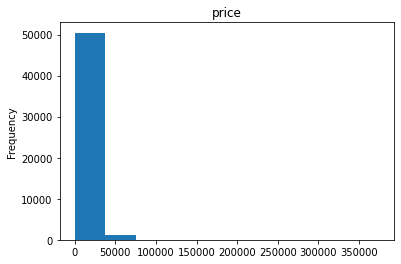

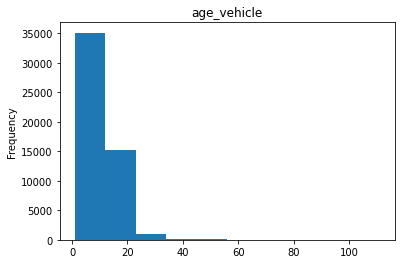

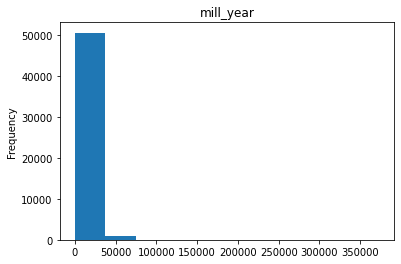

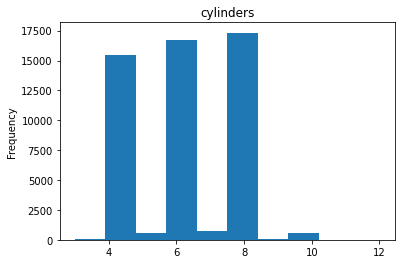

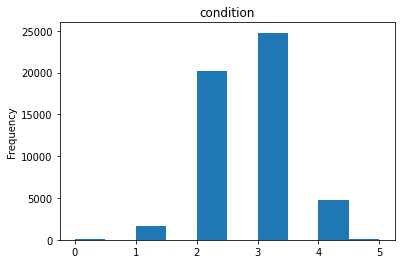

In [55]:

for column in ['price','age_vehicle','mill_year','cylinders','condition']:
    vehicles_data[column].plot(kind='hist', title=column)
    plt.show()


    

## Estudiar y tratar valores atípicos

[Con los resultados anteriores, determina qué columnas pueden contener valores atípicos y crea un DataFrame sin esos valores atípicos. Pista: los valores atípicos se pueden identificar tras definir el límite inferior/superior para el rango normal de valores.]

In [108]:
# Determina los límites inferiores para valores atípicos
def límite_inferior (columna_a_procesar):
    q1=vehicles_data[columna_a_procesar].quantile(0.25)
    q3=vehicles_data[columna_a_procesar].quantile(0.75)
    iqr_columna=q3-q1    
    liminf=q1-(1.5*iqr_columna)
    return liminf

In [57]:
# Determina los límites superiores para valores atípicos
def límite_superior (columna_a_procesar):
    q1=vehicles_data[columna_a_procesar].quantile(0.25)
    q3=vehicles_data[columna_a_procesar].quantile(0.75)
    iqr_columna=q3-q1    
    limsup=q3+(1.5*iqr_columna)
    return limsup

print(límite_superior('price'))
print(límite_superior('age_vehicle'))
print(límite_superior('mill_year'))


34597.5
25.0
29180.813971743017


In [58]:
# Almacena los datos sin valores atípicos en un DataFrame separado
vehicles_data_stat=vehicles_data.query('@límite_inferior("price")<price<=@límite_superior("price") & @límite_inferior("age_vehicle")<age_vehicle<=@límite_superior("age_vehicle") & @límite_inferior("mill_year")<mill_year<=@límite_superior("mill_year")')
vehicles_data_stat.head()

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek_posted,month_posted,year_posted,age_vehicle,mill_year
0,0,9400,2011.000000,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8.000000,18125.000000
1,1,25500,2009.354702,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,9.645298,9196.709584
2,2,5500,2013.000000,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7.000000,15714.285714
3,3,1500,2003.000000,ford f-150,1,8.0,gas,161397.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,17.000000,9493.941176
4,4,14900,2017.000000,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3.000000,26967.666667


Podemos observar en este caso que el valor de la columna mill_year de la fia 4, podemos apreciar que su valor es de 40451.500 y el valor limite superior del bigote es de 35777.5, por lo tanto en el nuevo data frame, no encontramos esta publicación, observando que el filtrado se llevó correctamente.

In [111]:
vehicles_data_stat.reset_index().head()

,level_0,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek_posted,month_posted,year_posted,age_vehicle,mill_year
0,0,0,9400,2011.000000,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8.000000,18125.000000
1,1,1,25500,2009.354702,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,9.645298,9196.709584
2,2,2,5500,2013.000000,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7.000000,15714.285714
3,3,3,1500,2003.000000,ford f-150,1,8.0,gas,161397.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,17.000000,9493.941176
4,4,4,14900,2017.000000,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3.000000,26967.666667


[Regresar a Contenido](#back)

## Step 3. EDA <a id='eda'></a>

## Estudiar parámetros principales sin valores atípicos

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


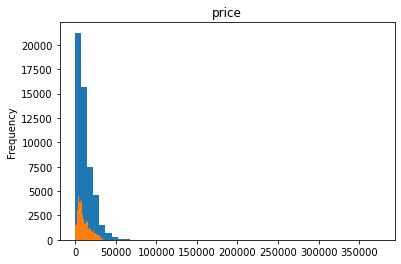

In [60]:
print(vehicles_data['price'].plot(kind='hist',bins=50, title='price'),vehicles_data_stat['price'].plot(kind='hist',bins=30, title='price'))

Se puede observar una gran diferencia en la relaciónd e losprecios de los datos originales a los datos ya filtrados, esto princialmente se debe a los datos ausentes que se tenían, de igual manea había datos atípicos como precios de autos menores a 1000, los cuales fueron eliminados.

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


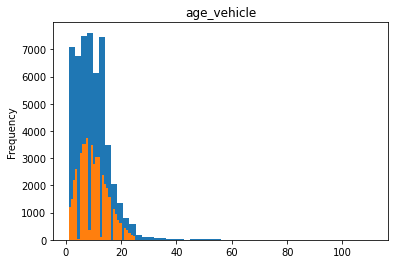

In [61]:
print(vehicles_data['age_vehicle'].plot(kind='hist',bins=50, title='age_vehicle'), vehicles_data_stat['age_vehicle'].plot(kind='hist',bins=30, title='age_vehicle'))

Se puede observar una diferencia en la relación de datos sin procesar con la de datos porcesados, donde podemos obserbar que se tenían datos erroneos y atípicos 

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


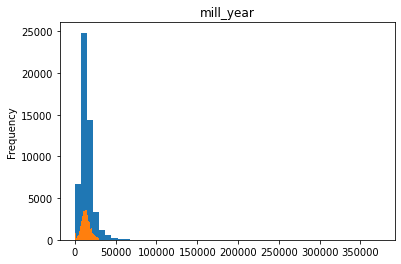

In [62]:
print(vehicles_data['mill_year'].plot(kind='hist',bins=50, title='mill_year'),vehicles_data_stat['mill_year'].plot(kind='hist',bins=30, title='mill_year'))

Podemos apreciar que el comportamiento de los datos, siguen la misma línea, obviamente, una vez que procesamos datos y eliminamos los datos ausentes, la población de datos disminuye.

## Periodo de colocación de los anuncios



In [63]:
vehicles_data_stat['days_listed'].mean()

39.55260417773433

In [64]:
vehicles_data_stat['days_listed'].median()

33.0

In [65]:
límite_inferior_days_listed=vehicles_data_stat['days_listed'].quantile(0.25)
límite_inferior_days_listed

19.0

In [66]:
límite_superior_days_listed=vehicles_data_stat['days_listed'].quantile(0.75)
límite_superior_days_listed

53.0

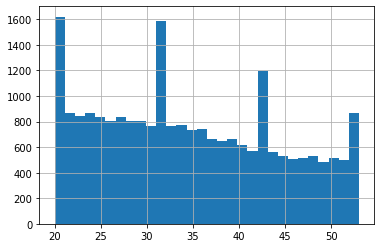

In [67]:
days_listed_filtrado=vehicles_data_stat.query('@límite_inferior_days_listed<days_listed<=@límite_superior_days_listed')
days_listed_filtrado['days_listed'].hist(bins=30)
plt.show()

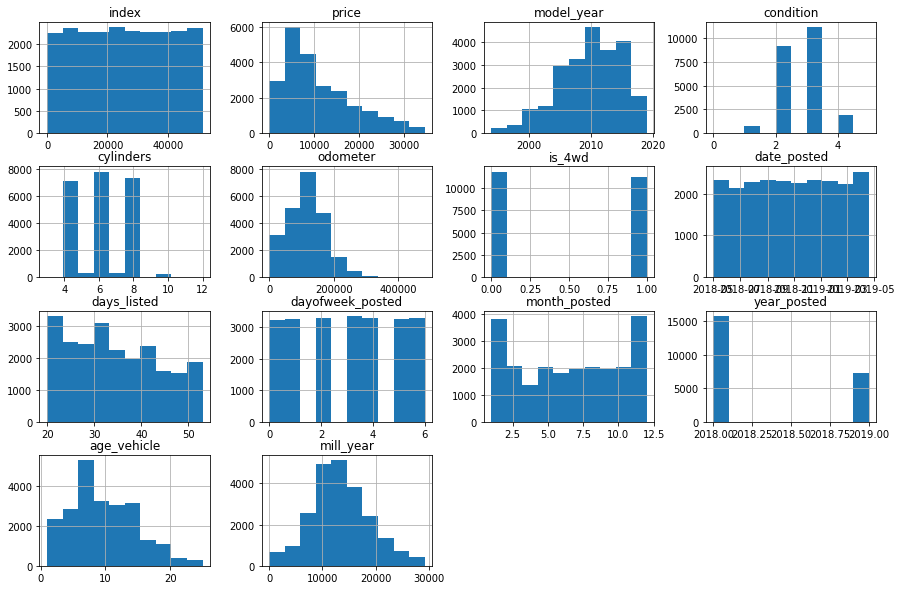

In [68]:
days_listed_filtrado.hist(figsize=(15,10))
plt.show()

En esta ocasión ocuparemos de igual manera el intervalo intercuartil como el perido normal de publicación, mientras de por debajo de primer cuartil se podríandenominar  valores anormalmente cortos, mientras que arriba del tercer cuartil pdoemos denominarlos como anormalmente largos, por lo que en el histograma podemos observar que hay una mayor concentración de anunción cuando a menos días de anunciarse el auto que cuando tiene alrededor de 50 días. en este caso no se consideró los bigótes como límites inferiores porque efectivamente el valor mínimo es cero y también se incluiría, por lo que no tendríamos una medida de tiempo real por lo que se consideró el rango intercuartil.

## Precio promedio por cada tipo de vehículo

[Analiza el número de anuncios y el precio promedio para cada tipo de vehículo. Traza un gráfico mostrando la dependencia de la cantidad de anuncios en cada tipo de vehículo. Selecciona los dos tipos con un mayor número de anuncios.]

In [69]:
vehicles_data_stat['type'].sort_values().value_counts()

SUV            11633
sedan          11593
truck          10727
pickup          6184
coupe           2033
wagon           1492
mini-van        1086
hatchback        985
van              550
convertible      349
other            224
offroad          182
bus               21
Name: type, dtype: int64

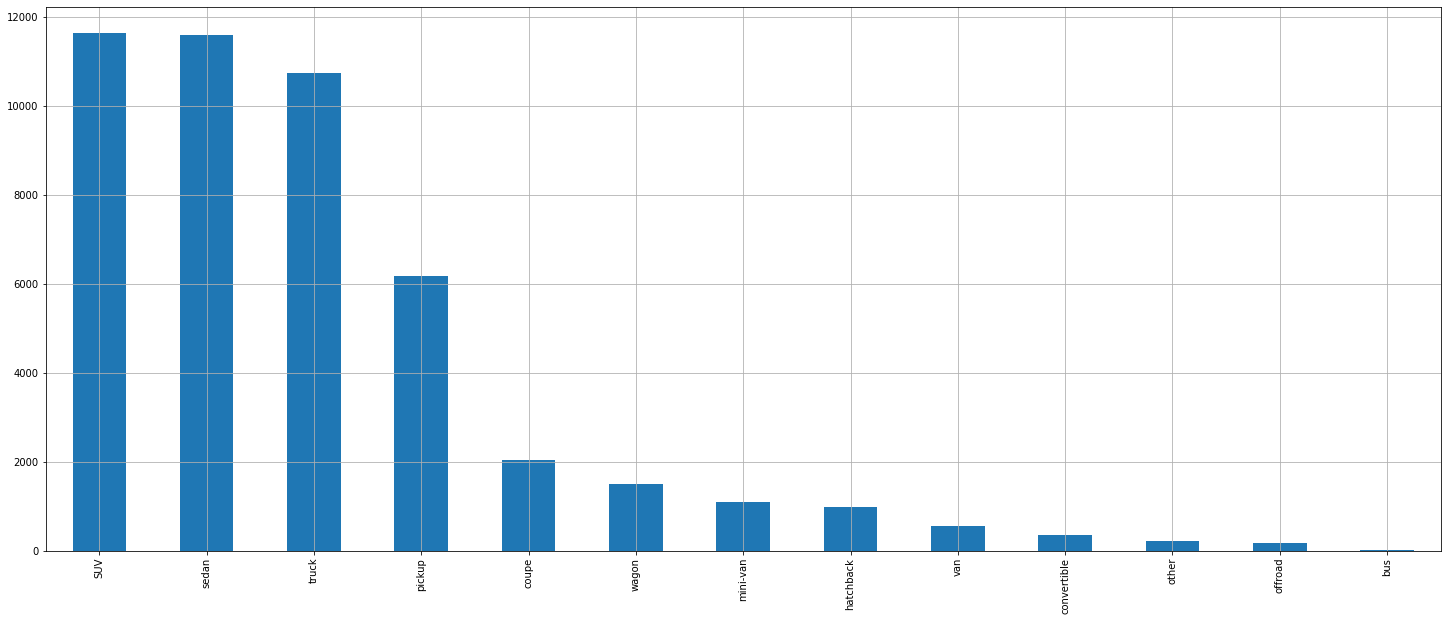

In [70]:
vehicles_data_stat['type'].value_counts().plot(kind='bar',grid=True, figsize=(25,10))
plt.show()

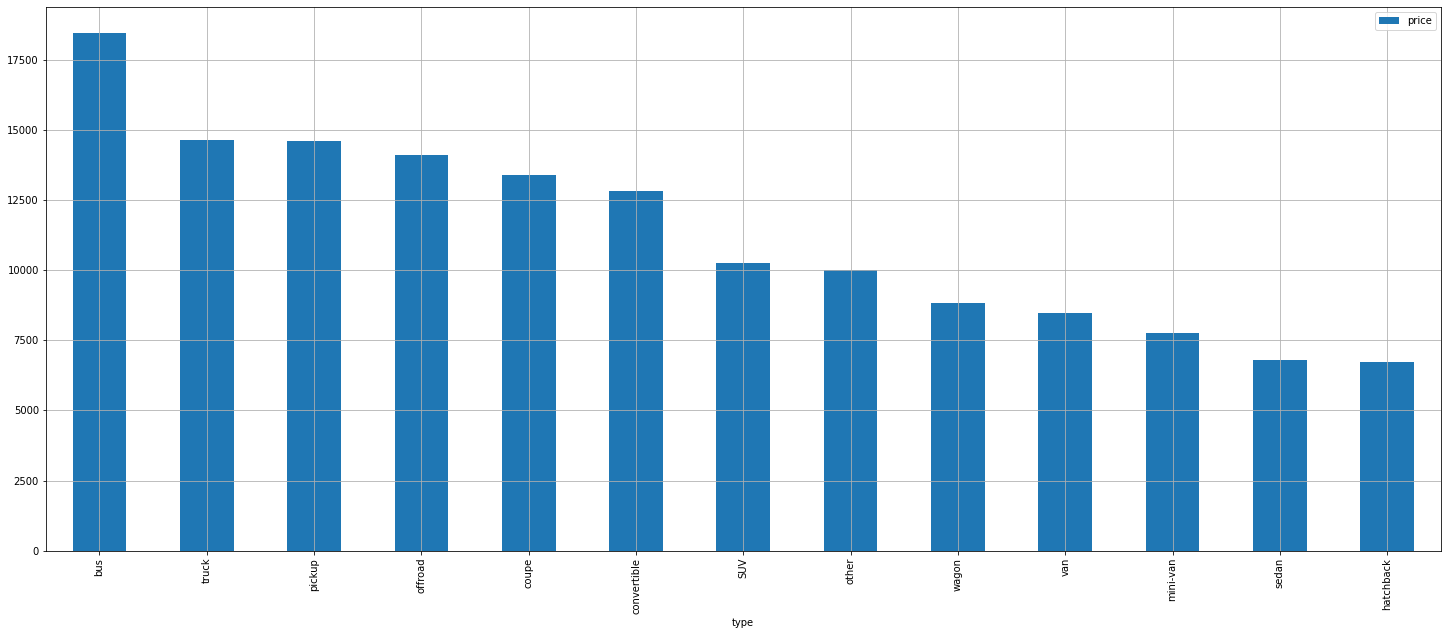

In [71]:
vehicles_data_stat.pivot_table(index='type', values='price', aggfunc='mean').sort_values(by='price', ascending=False).plot(kind='bar',grid=True, figsize=(25,10))
plt.show()

Los dos tipos con un mayor número de anuncios son los vehículos 'truck' y 'SUV', lo cual nos indican que son los más publicados, también se puede observar que no son los de precio promedio más económicos, siendo los autos 'truck' unos de los mayor precio.

## Factores de precio

Se comienza a hacer el análisis de los precios de los dos tipos de vehículos con mayor número de anuncios que son los SUV y Truck, por lo que se hará tres tablas de cada uno de los parámetros, uno de tipo de vehículo Truck (vehicles_data_stat_truck), uno del tipo de vehículo SUV (vehicles_data_stat_suv) y uno de ambos tipos (vehicles_data_stat_top).


In [72]:
vehicles_data_stat_top=vehicles_data_stat.query('type == "truck" or type == "SUV"')
vehicles_data_stat_truck=vehicles_data_stat.query('type == "truck"')
vehicles_data_stat_suv=vehicles_data_stat.query('type == "SUV"')

In [73]:
vehicles_data_stat_truck['transmission'].value_counts()

automatic    10147
manual         396
other          184
Name: transmission, dtype: int64

In [74]:
vehicles_data_stat_suv['transmission'].value_counts()

automatic    11010
manual         464
other          159
Name: transmission, dtype: int64

In [75]:
vehicles_data_stat_top['transmission'].value_counts()

automatic    21157
manual         860
other          343
Name: transmission, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

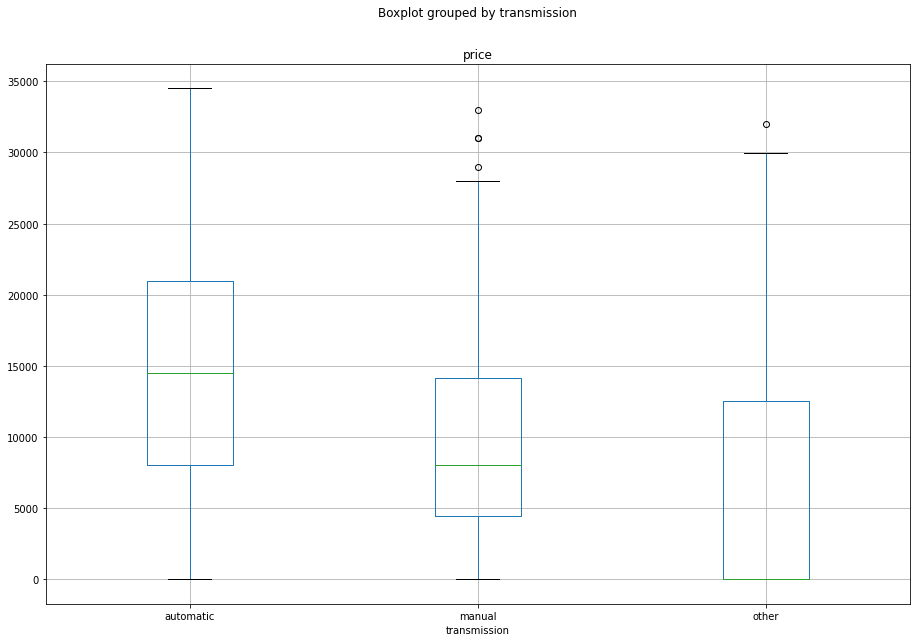

In [76]:
vehicles_data_stat_truck.boxplot(column='price',by='transmission', figsize=(15,10))

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

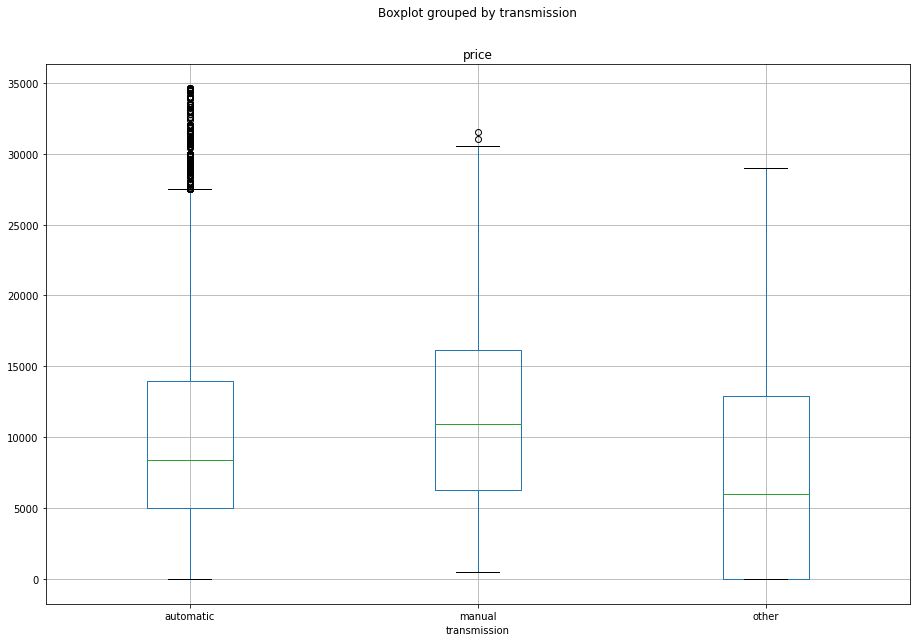

In [77]:
vehicles_data_stat_suv.boxplot(column='price',by='transmission', figsize=(15,10))

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

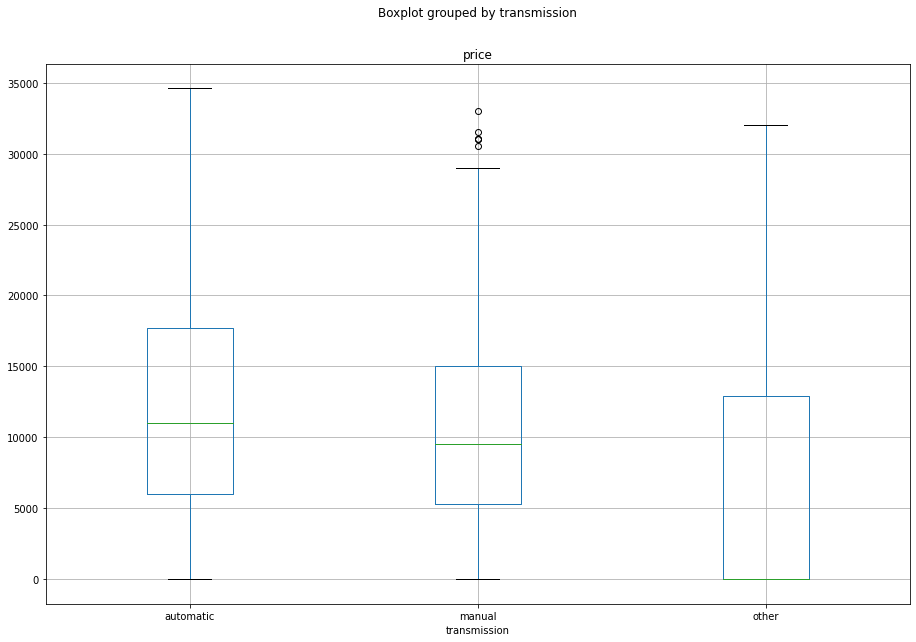

In [78]:
vehicles_data_stat_top.boxplot(column='price',by='transmission', figsize=(15,10))

In [79]:
vehicles_data_stat_truck['paint_color'].value_counts()

white      3147
unknown    1856
black      1351
red         951
silver      921
grey        819
blue        808
custom      299
green       259
brown       230
orange       45
yellow       27
purple       14
Name: paint_color, dtype: int64

In [80]:
vehicles_data_stat_suv['paint_color'].value_counts()

unknown    2098
black      2059
white      1807
silver     1478
grey       1100
blue        982
red         868
green       429
brown       355
custom      296
orange       78
yellow       44
purple       39
Name: paint_color, dtype: int64

In [81]:
vehicles_data_stat_top['paint_color'].value_counts()

white      4954
unknown    3954
black      3410
silver     2399
grey       1919
red        1819
blue       1790
green       688
custom      595
brown       585
orange      123
yellow       71
purple       53
Name: paint_color, dtype: int64

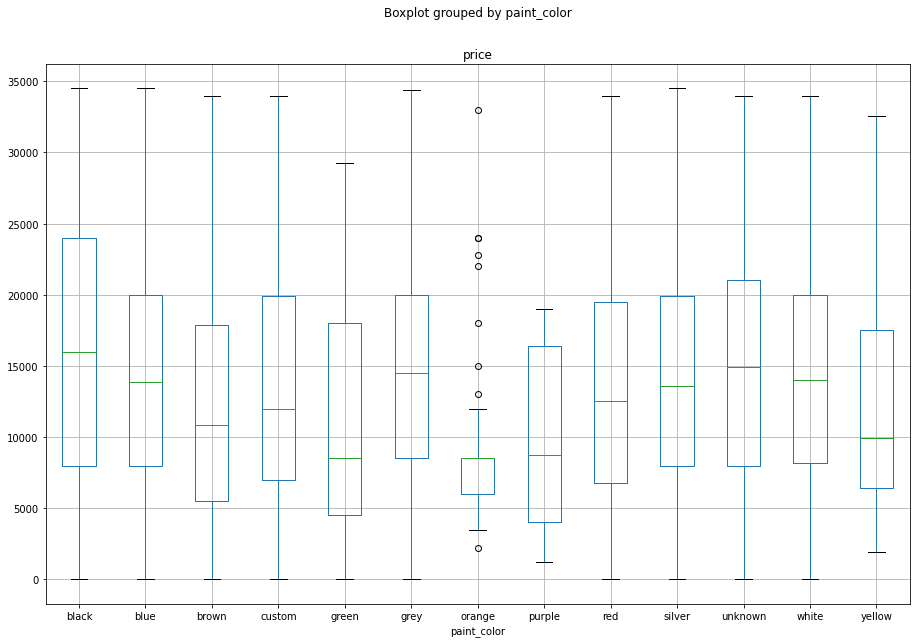

In [82]:
vehicles_data_stat_truck.boxplot(column='price',by='paint_color', figsize=(15,10))
plt.show()

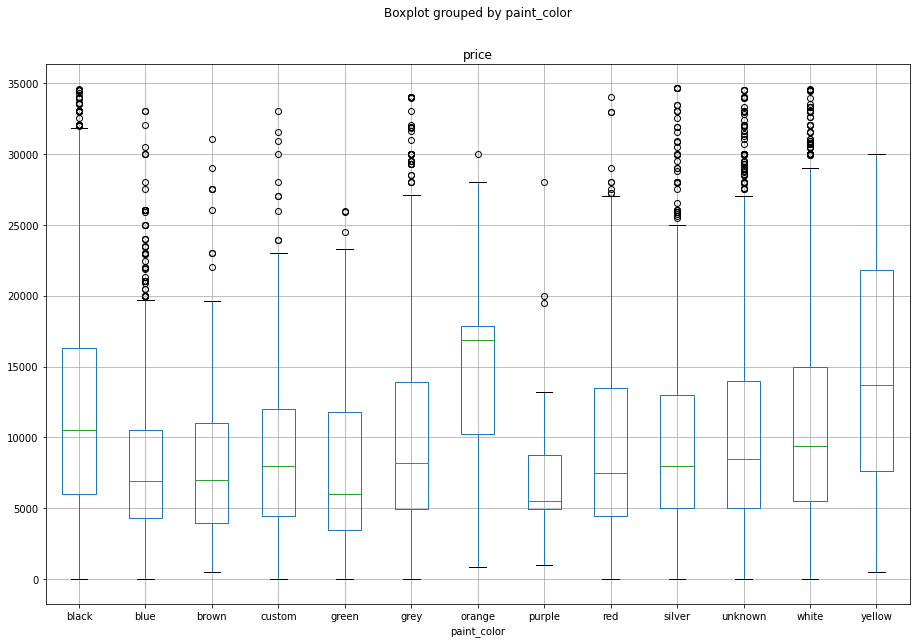

In [83]:
vehicles_data_stat_suv.boxplot(column='price',by='paint_color', figsize=(15,10))
plt.show()

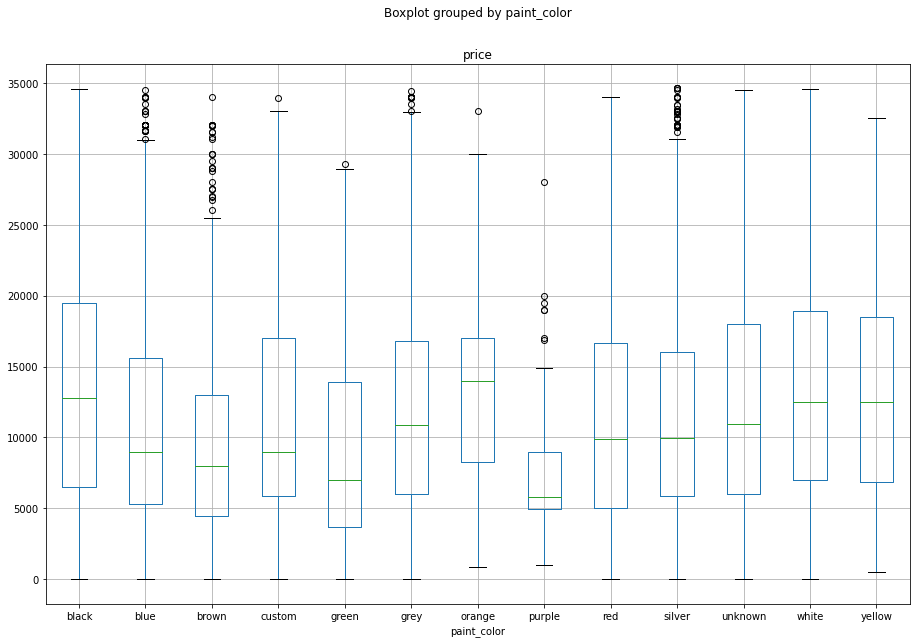

In [84]:
vehicles_data_stat_top.boxplot(column='price',by='paint_color', figsize=(15,10))
plt.show()

In [85]:
vehicles_data_stat_truck['age_vehicle'].value_counts()

8.000000     856
6.000000     698
5.000000     682
13.000000    625
7.000000     616
            ... 
9.295970       1
11.504290      1
10.142276      1
11.732308      1
6.895833       1
Name: age_vehicle, Length: 85, dtype: int64

In [86]:
vehicles_data_stat_suv['age_vehicle'].value_counts()

8.000000     909
12.000000    828
7.000000     775
6.000000     741
9.000000     736
            ... 
9.649648       1
12.311404      1
7.639013       1
10.600798      1
10.763575      1
Name: age_vehicle, Length: 95, dtype: int64

In [87]:
vehicles_data_stat_top['age_vehicle'].value_counts()

8.000000     1765
6.000000     1439
12.000000    1424
5.000000     1403
7.000000     1391
             ... 
7.059891        2
10.763575       1
10.600798       1
7.639013        1
6.895833        1
Name: age_vehicle, Length: 146, dtype: int64

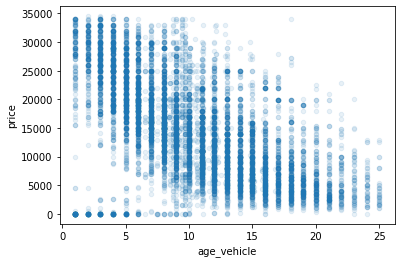

In [88]:
vehicles_data_stat_truck.plot(x='age_vehicle',y='price',kind='scatter', alpha=0.1)
plt.show()

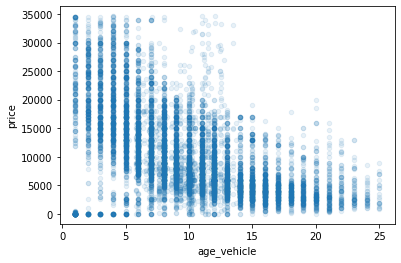

In [89]:
vehicles_data_stat_suv.plot(x='age_vehicle',y='price',kind='scatter', alpha=0.1)
plt.show()

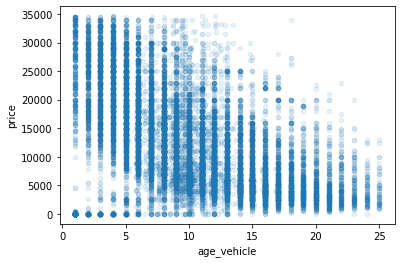

In [90]:
vehicles_data_stat_top.plot(x='age_vehicle',y='price',kind='scatter', alpha=0.1)
plt.show()

In [91]:
vehicles_data_stat_truck['mill_year'].value_counts()

18000.000000    179
15442.250000    104
15000.000000     86
12896.500000     86
16640.000000     84
               ... 
25509.666667      1
2010.188547       1
13061.857143      1
9572.166667       1
17568.142857      1
Name: mill_year, Length: 5704, dtype: int64

In [92]:
vehicles_data_stat_suv['mill_year'].value_counts()

18000.000000    151
15442.250000     94
15788.214286     92
12896.500000     89
16640.000000     87
               ... 
19771.750000      1
12962.846154      1
13963.000000      1
18512.198773      1
11301.000000      1
Name: mill_year, Length: 6679, dtype: int64

In [93]:
vehicles_data_stat_top['mill_year'].value_counts()

18000.000000    330
15442.250000    198
12896.500000    175
16640.000000    171
19628.500000    159
               ... 
9533.000000       1
12949.500000      1
10860.235793      1
14104.642857      1
9712.470588       1
Name: mill_year, Length: 11576, dtype: int64

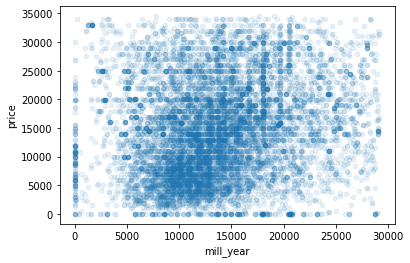

In [94]:
vehicles_data_stat_truck.plot(x='mill_year',y='price',kind='scatter', alpha=0.1)
plt.show()

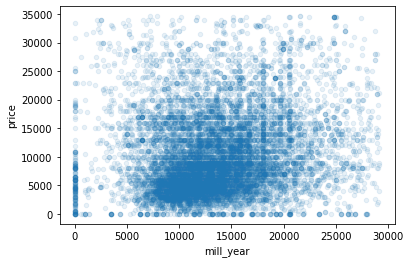

In [95]:
vehicles_data_stat_suv.plot(x='mill_year',y='price',kind='scatter', alpha=0.1)
plt.show()

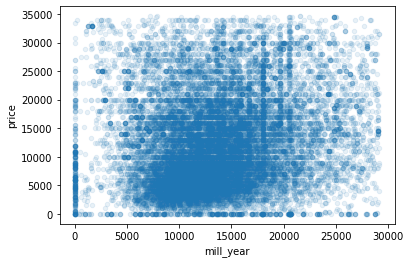

In [96]:
vehicles_data_stat_top.plot(x='mill_year',y='price',kind='scatter', alpha=0.1)
plt.show()

In [97]:
vehicles_data_stat_truck['condition'].value_counts()

2    4785
3    4751
4     803
1     363
5      14
0      11
Name: condition, dtype: int64

In [98]:
vehicles_data_stat_suv['condition'].value_counts()

3    6124
2    4115
4    1050
1     309
0      18
5      17
Name: condition, dtype: int64

In [99]:
vehicles_data_stat_top['condition'].value_counts()

3    10875
2     8900
4     1853
1      672
5       31
0       29
Name: condition, dtype: int64

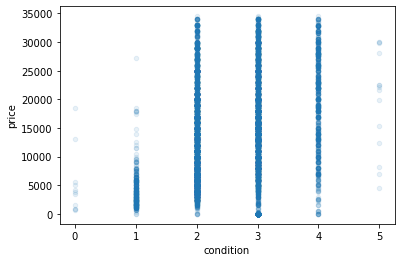

In [100]:
vehicles_data_stat_truck.plot(x='condition',y='price',kind='scatter', alpha=0.1)
plt.show()

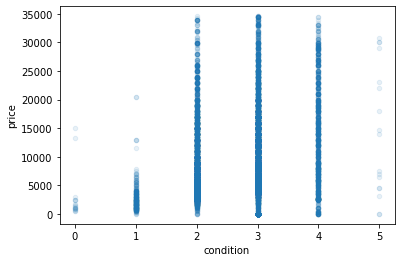

In [101]:
vehicles_data_stat_suv.plot(x='condition',y='price',kind='scatter', alpha=0.1)
plt.show()

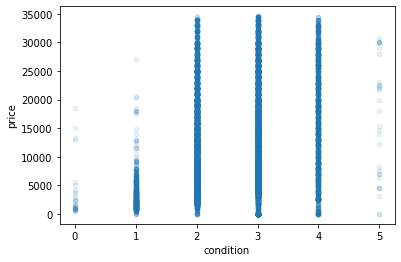

In [102]:
vehicles_data_stat_top.plot(x='condition',y='price',kind='scatter', alpha=0.1)
plt.show()

In [103]:
vehicles_data_stat_filter=vehicles_data_stat_top[['price','age_vehicle','mill_year','condition']]
vehicles_data_stat_filter.reset_index()

,index,price,age_vehicle,mill_year,condition
0,0,9400,8.0,18125.000000,2
1,7,15990,7.0,15639.000000,3
2,8,11500,7.0,14882.000000,3
3,9,9200,12.0,12265.916667,3
4,14,12990,11.0,12025.909091,3
...,...,...,...,...,...
22355,51498,15900,9.0,13726.444444,3
22356,51500,6995,7.0,22428.571429,3
22357,51502,7995,9.0,12343.111111,4
22358,51505,2000,20.0,6100.000000,2


In [104]:
vehicles_data_stat_filter.corr()

,price,age_vehicle,mill_year,condition
price,1.000000,-0.551205,0.159952,0.247385
age_vehicle,-0.551205,1.000000,-0.474705,-0.325552
mill_year,0.159952,-0.474705,1.000000,0.029717
condition,0.247385,-0.325552,0.029717,1.000000


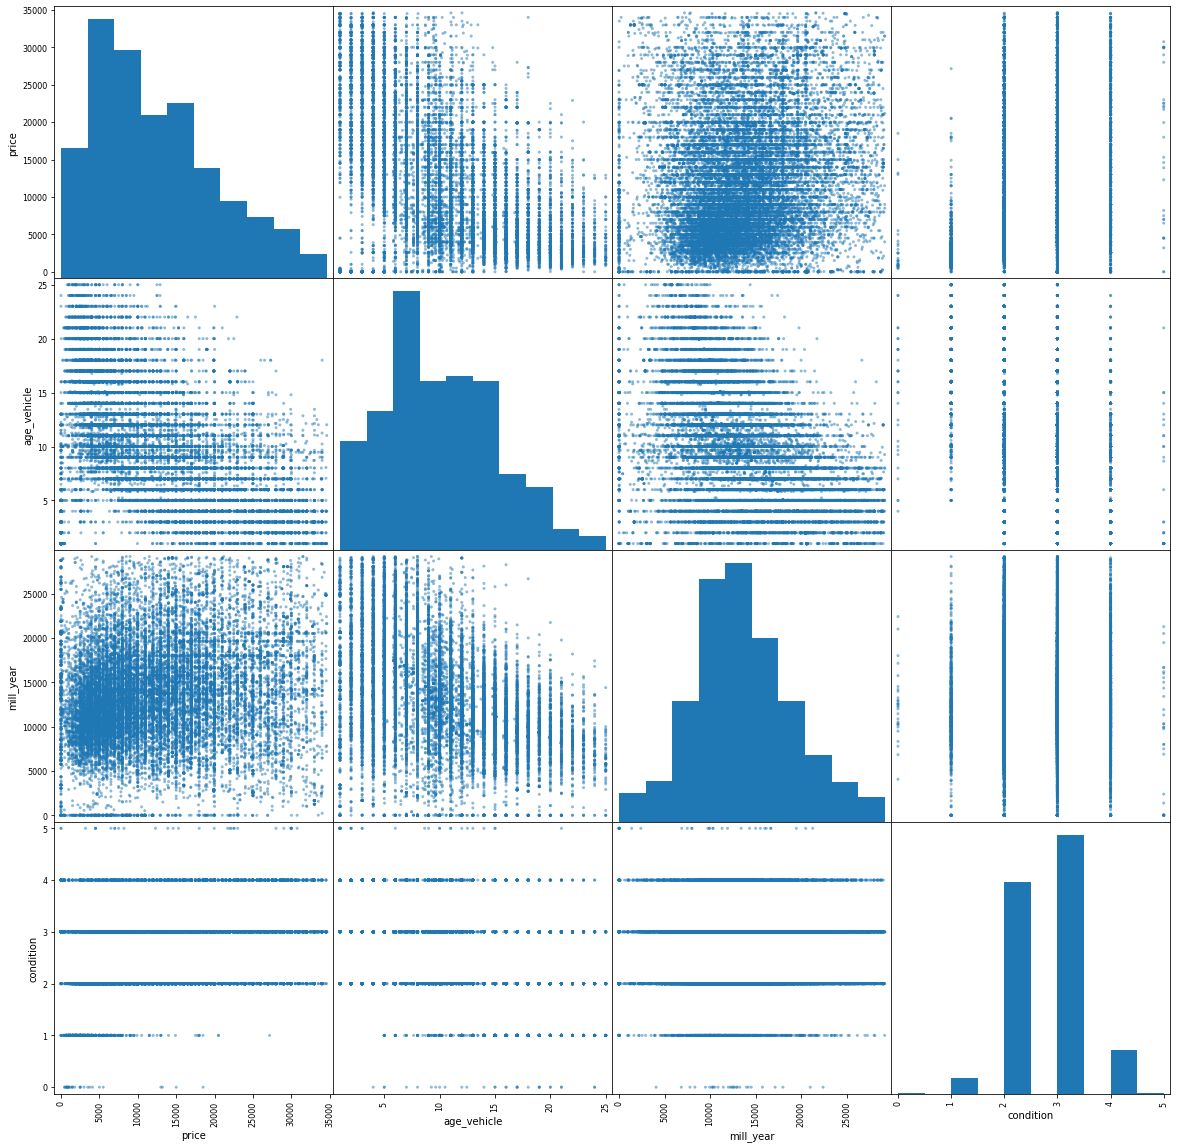

In [105]:
pd.plotting.scatter_matrix(vehicles_data_stat_filter, figsize=(20, 20)) 
plt.show()

 Podemos observar que en el caso de los vehículos Truck y SUV, los de mayor precio podemos observar la mediana en los de tipo de transmisión de tipo ‘other’, mientras que el segundo tipo de transmisión varía entre el tipo de vehículo. Mientras que en la gráfica general de estos tipos de vehículos observamos lo mismo en primer lugar, la mediana de la transmisión ‘other’, siendo en segundo lugar generalmente tenemos la transmisión ‘automatic’, siendo muy semejantes sus valores. Por lo que los tipos de transmisión de mayor precio es le de ‘other’. Sin embargo, no se considera un parámetro decisivo para el precio de un vehículo, ya que la mediana de los precios de los vehículos en las diferentes transmisiones oscila entre los mil dólares.

Ahora considerando el parámetro color, podemos observar que la mediana de mayor precio es la en los vehículos Truck de color negro. Mientras que en los vehículos SUV de color naranja, siguiéndole el negro y el amarillo. En el data frame general de estos dos tipos de vehículos, tenemos  a los vehículos de mayor precio los de color amarillo, naranja y negro, por lo que el precio de los vehículos en este caso y varía el precio de los mismos.

Podemos observar que la relación entre precio y años del vehículo cuando se publicó el anuncio, mantienen una relación inversamente proporcional, debido a que podemos visualizar que conforme menos años tengan los vehículos el precio es mayor, por lo tanto entre más años tenga el vehículo menor es su precio, este comportamiento se observó en todas la graficas.

Se puede observar que en todos los casos en los dos tipos de vehículos, no se observa un comportamiento definido, ya que solamente se observa que hay un mayor número de anuncios en vehículos con un millaje alrededor de 10 mil con precios entre  10 mil a 20 mil dólares, por lo que el millaje no representa un parámetro del cual dependa el precio.

Con respecto a la condición, podemos observar que en general en estos dos tipos de vehículos Truck y SUV, los vehículos de mayor precio son los de condición excelente y como nuevo,  siguiéndole bien y posteriormente el resto, con precios más bajos. Por lo que el precio si puede depender de la condición del vehículo.

[Regresar a Contenido](#back)


## Conclusión general <a id='end'></a>

[Enumera tus conclusiones importantes en esta sección final, asegúrate de que incluyan aquellas que te llevaron a la forma en que procesaste y analizaste los datos. Habla de los valores ausentes, duplicados, valores atípicos y las posibles razones y soluciones para los artefactos problemáticos que tuviste que abordar. No olvides eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

Con base a los resultados obtenidos en dicho proyecto, podemos concluir que:

1. el periodo de tiempo en el que fueron publicados los anuncios de los vehiculos, no nos permite determinar cuando se eliminan rápido los anunció o cuando son publicados por un tiempo anormalmente largo, ya que en ambos casos tienen un comportamiento semejante y no nos permite que condiciones permiten observar diferencias.

2. Los vehículos con mayor número de anuncios por modelo son los ford f-150  y los chevrolet silverad, vehículos tienen precios diferentes dependiendo parámetros como color, año del modelo, etc.

3. El tipo que vehículo que más se anuncia son los tipo sedán y los Truck, considerando esto la mayoría de los vehículos de modelo, son ford f-150  y los chevrolet silverad son del tipo Truck.

4. Podemos determinar que los vehículos de mayor precio con base al precio de los precios promedio de cada tipo de vehículos son los de tipo bus, siguiendo en la escala los vehículos de tipo Truck y quedando en tercer lugar los vehículos pick up.

5. Los tipos de vehículos con mayor número de anuncios son los de tipo Truck, le sigue los de tipo SUV y posteriormente en tercer lugar los vehículos sedán. por lo tanto, podemos indicar que los vehículos Truck son los que mayor anuncios tienen y son unos de los de mayor precios.

6. Los vehículos de mayor precio en los tipos SUV y Truck, son los vehículos de color amarillo, naranja y negro; de igual manera los vehículos menor tiempo cuando fueron aunciados tienen un mayor precio y también suelen ser de mayor precio si están en una condición excelente. Mientras que el precio no de los parámetros de millaje y transmisión no 

[Regresar a Contenido](#back)

